<div style="text-align: center; font-size: 25px;">
Trực quan hóa dữ liệu - CQ2021/21 <br>
Nhóm 02<br>
TLab 01: Data visualization with Python <br>
Chủ đề: Visualize Netflix movies and TV show
</div>

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,9/25/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,9/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# A. Thu thập dữ liệu

* Ngữ cảnh:
    * Netflix là một trong những nền tảng truyền thông phương tiện và phát trực tuyến lớn nhất, với hơn 8000 phim và chương trình truyền hình, và cùng với 260 triệu người đăng ký.

    * Để tìm hiểu thêm về Netflix, cũng như dữ liệu về nội dung mà nền tảng này cung cấp, từ đó hiểu rõ hơn về định hướng của nền tảng, nhóm đã quyết định chọn bộ dữ liệu này để phân tích.

* Bộ dữ liệu:
    * Chủ đề: Phim và chương trình truyền hình của Netflix.
    * Nguồn: https://www.kaggle.com/datasets/shivamb/netflix-shows

* License:
    * CC0: Hoàn toàn có được sự cho phép để copy, chỉnh sửa, phân loại và thực hiện các công việc mà không cần phải xin giấy phép.

* Cách thức thu thập dữ liệu:
    * Nguồn thu thập: cố định trên nền tảng Netflix
    * Sử dụng cách gọi API để thu thập các dữ liệu trên nền tảng

# B. Khám phá dữ liệu

In [183]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  8807
Number of columns:  12


* Bộ dữ liệu có tổng cộng 8807 dòng, mỗi dòng đều có đúng 1 ý nghĩa, đó là thể hiện dữ liệu liên quan đến 1 bộ phim hoặc chương trình truyền hình cụ thể

* Bộ dữ liệu có 12 cột:
    * `show_id`: chứa các giá trị id duy nhất cho một bộ phim/chương trình truyền hình
    * `type`: thể loại của bộ phim/chương trình truyền hình
    * `title`: tên của bộ phim/chương trình truyền hình
    * `director`: tên của đạo diễn 
    * `cast`: các diễn viên tham gia bộ phim/chương trình truyền hình
    * `country`: quốc gia mà bộ phim/chương trình truyền hình được sản xuất
    * `date_added`: ngày được thêm vào Netflix
    * `release_year`: năm phát hành của bộ phim/chương trình truyền hình
    * `rating`: đánh giá độ tuổi được phép xem của bộ phim/chương trình truyền hình
    * `duration`: tổng thời lượng phát sóng
    * `listed_in`: các thể loại
    * `description`: mô tả nội dung

In [184]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


* Kiểu dữ liệu của từng cột
    * `show_id`: object
    * `type`: object
    * `title`: object
    * `director`: object
    * `cast`: object
    * `country`: object
    * `date_added`: object
    * `release_year`: int
    * `rating`: object
    * `duration`: object
    * `listed_in`: object
    * `description`: object

* Sau quá trình kiểm tra các giá trị của các cột trên thì ta nên xử lý cột `date_added`, chuyển dữ liệu từ object sang datetime

In [185]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [186]:
print('Total unique id value: ', df['show_id'].nunique())
print('Number of null values: ', df['show_id'].isnull().sum())
df['show_id'].head()

Total unique id value:  8807
Number of null values:  0


0    s1
1    s2
2    s3
3    s4
4    s5
Name: show_id, dtype: object

In [187]:
print('Type: ', df['type'].unique())
print('Total unique value: ', df['type'].nunique())
print('Number of null values: ', df['type'].isnull().sum())

Type:  ['Movie' 'TV Show']
Total unique value:  2
Number of null values:  0


In [188]:
print('Total unique title value: ', df['title'].nunique())
print('Number of null values: ', df['title'].isnull().sum())
df['title'].head()

Total unique title value:  8804
Number of null values:  0


0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [189]:
print('Total unique director value: ', df['director'].nunique())
print('Number of null values: ', df['director'].isnull().sum())
df['director'].head()

Total unique director value:  4528
Number of null values:  2634


0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

In [190]:
print('Total unique cast value: ', df['cast'].nunique())
print('Number of null values: ', df['cast'].isnull().sum())
df['cast'].head()

Total unique cast value:  7692
Number of null values:  825


0                                                  NaN
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  NaN
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

In [191]:
print('Total unique country value: ', df['country'].nunique())
print('Number of null values: ', df['country'].isnull().sum())
df['country'].head()

Total unique country value:  748
Number of null values:  831


0    United States
1     South Africa
2              NaN
3              NaN
4            India
Name: country, dtype: object

In [192]:
print('Date added from: ', df['date_added'].min(), ' to ', df['date_added'].max())
print('Number of null values: ', df['date_added'].isnull().sum())

Date added from:  2008-01-01 00:00:00  to  2021-09-25 00:00:00
Number of null values:  10


In [193]:
print('Release year from: ', df['release_year'].min(), ' to ', df['release_year'].max())
print('Number of null values: ', df['release_year'].isnull().sum())

Release year from:  1925  to  2021
Number of null values:  0


In [194]:
print('Rating: ', df['rating'].unique())
print('Total unique value: ', df['rating'].nunique())
print('Number of null values: ', df['rating'].isnull().sum())

Rating:  ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' nan 'TV-Y7-FV' 'UR']
Total unique value:  14
Number of null values:  4


In [195]:
print('Total unique duration value: ', df['duration'].nunique())
print('Number of null values: ', df['duration'].isnull().sum())
df['duration'].head()

Total unique duration value:  220
Number of null values:  0


0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

In [196]:
print('Total unique listed_in value: ', df['listed_in'].nunique())
print('Number of null values: ', df['listed_in'].isnull().sum())
df['listed_in'].head()

Total unique listed_in value:  514
Number of null values:  0


0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [197]:
print('Number of null values: ', df['description'].isnull().sum())
df['description'].head()

Number of null values:  0


0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

* Với mỗi cột, các giá trị được phân bố như sau:
    * `show_id`: 8807 giá trị id duy nhất
    * `type`: chỉ có 2 giá trị: `Movie` và `TV Show`
    * `title`: 8807 tên khác nhau
    * `director`: có khoảng 30% hàng không có giá trị, còn lại sẽ có 4528 cái tên phân biệt
    * `cast`: có khoảng 9% hàng không có giá trị, còn lại sẽ có 7692 cái tên phân biệt
    * `country`: có khoảng 9% hàng không có giá trị, còn lại sẽ có 748 cái tên phân biệt
    * `date_added`: bao gồm các giá trị ngày tháng năm trong khoảng từ 01-01-2008 đến 25-09-2021
    * `release_year`: bao gồm các giá trị số nguyên từ 1925 đến 2021
    * `rating`: bao gồm các giá trị nhãn, gồm 14 nhãn khác nhau
    * `duration`: thời lượng phát sóng được tính bằng số phút, hoặc tính theo mùa
    * `listed_in`: gồm 514 thể loại khác nhau
    * `description`: các chuỗi mô tả

* Đối với bộ dữ liệu trên thì việc tiền xử lý là không cần thiết, không có cột nào có quá nhiều hàng không có giá trị, chỉ duy nhất là cột director bị thiếu mất khoảng 30% giá trị, tuy nhiên vẫn có thể chấp nhận được.

# C. Khám phá mối quan hệ trong dữ liệu

### Nhận xét về loại hình phim (Movie type) trong dữ liệu

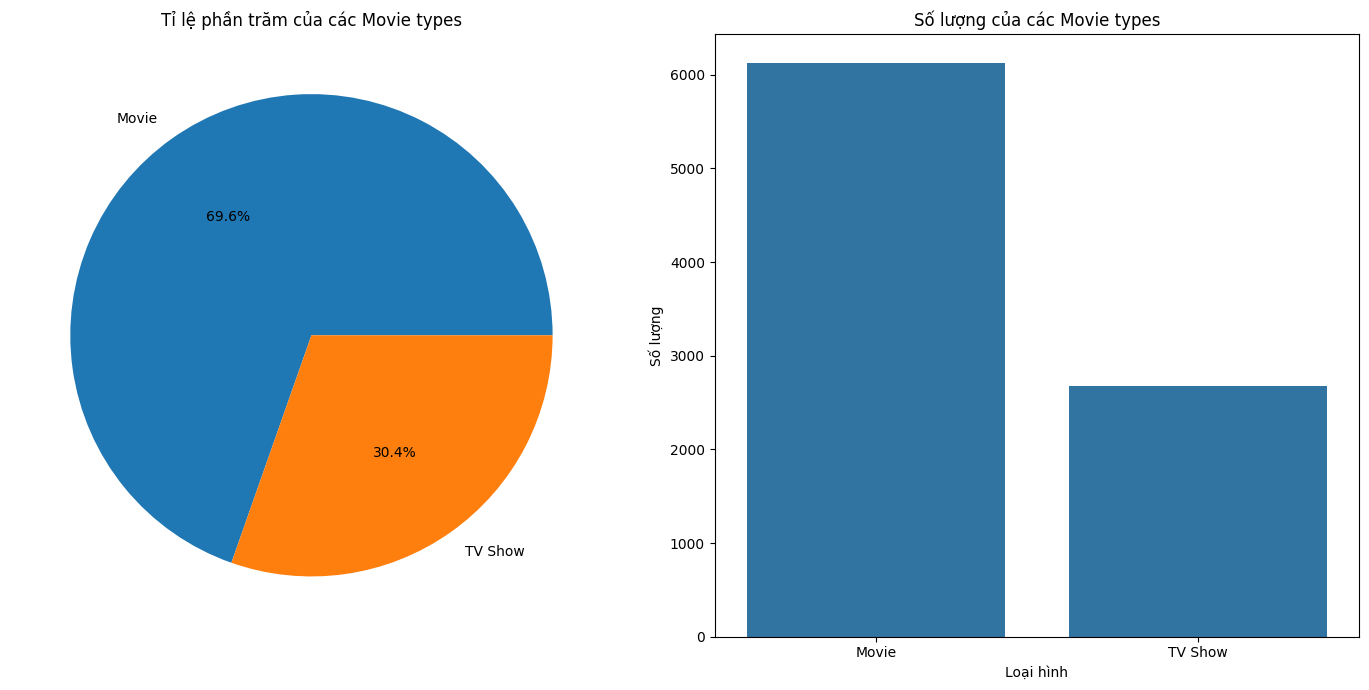

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart
type_counts = df['type'].value_counts()
axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
axes[0].set_title('Tỉ lệ phần trăm của các Movie types')

# Column chart
sns.countplot(x='type', data=df, ax=axes[1])
axes[1].set_ylabel('Số lượng')
axes[1].set_xlabel('Loại hình')
axes[1].set_title('Số lượng của các Movie types')

plt.tight_layout()
plt.show()


#### Lí do chọn biểu đồ
- Biểu đồ tròn thích hợp để hiển thị phần trăm của mỗi loại giá trị so với tổng số lượng. Điều này đặc biệt hữu ích khi biểu diễn tỷ lệ phần trăm của "Movie" so với "TV-Show" giúp người đọc dễ dàng so sánh tỷ lệ giữa hai loại giá trị.
- Biểu đồ cột thích hợp để trực quan hóa số lượng của các loại giá trị, trong trường hợp này là "Movie" và "TV-Show". Cột được sắp xếp theo thứ giảm dần, giúp người đọc dễ dàng so sánh các giá trị.


#### Nhận xét
*   Số lượng phim kiểu "Movie" chiếm đa số trong tất cả các phim, với hơn 2/3 tổng số lượng phim và gấp đôi số lượng phim kiểu "TV Show". Điều này chỉ ra sự phổ biến của Movie so với TV Show.

### Nhận xét về năm phát hành (Release Year) của các bộ phim

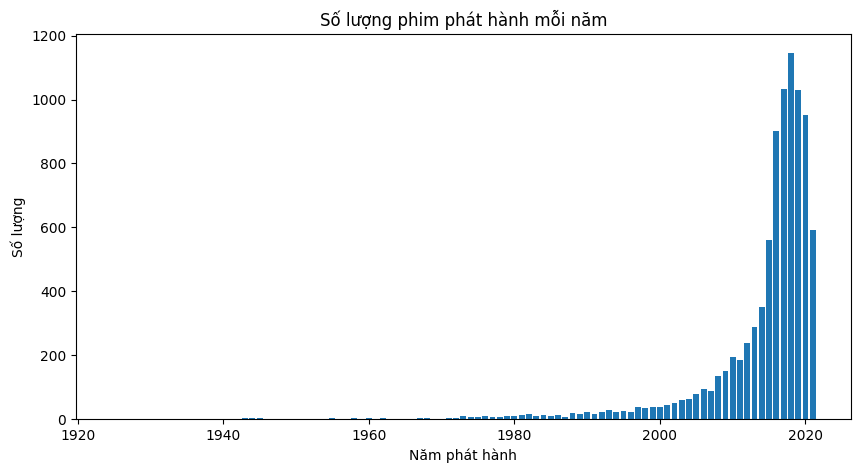

In [199]:
# Tính số lượng phát hành theo năm
release_counts = df['release_year'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10,5))
plt.bar(release_counts.index, release_counts.values)
plt.xlabel('Năm phát hành')
plt.ylabel('Số lượng')
plt.title('Số lượng phim phát hành mỗi năm')
plt.show()


#### Lý do chọn biểu đồ

* Biểu đồ cột rất phù hợp với trường hợp trường dữ liệu có nhiều giá trị như release year.
* Có thể dễ dàng nhìn thấy xu hướng phát triển của ngành công nghiệp điện ảnh qua thời gian.
* Biểu đồ được sắp xếp theo thứ tự tăng dần, giúp người đọc dễ so sánh số lượng phim phát hành giữa các năm hoặc nhận biết các năm có sự tăng trưởng đặc biệt.

#### Nhận xét

* Từ những năm 2000 trở đi, số lượng phim đã bắt đầu tăng dần, cho thấy ngành công nghiệp điện ảnh bắt đầu phát triển. Trước đó, số lượng phim rất ít và không có sự tăng trưởng đáng kể.
* Sự phát triển của ngành công nghiệp điện ảnh trở nên rõ rệt từ năm 2014, tăng đột biến số lượng phim được phát hành.
* Năm 2018 được xác định là năm đỉnh điểm của số lượng phim được phát hành, cho thấy sự phát triển mạnh mẽ của ngành công nghiệp điện ảnh tại thời điểm này.
* Từ năm 2018 trở đi, số lượng phim được phát hành giảm đột biến.

=> Tổng quan, biểu đồ minh họa một hành trình phát triển độc đáo của ngành công nghiệp điện ảnh, từ sự phát triển từ những năm 2000, đạt đỉnh cao vào năm 2018, và sau đó trải qua sự giảm đột biến trong thời gian sau đó.

### Nhận xét về quốc gia sản xuất (Country) của các bộ phim

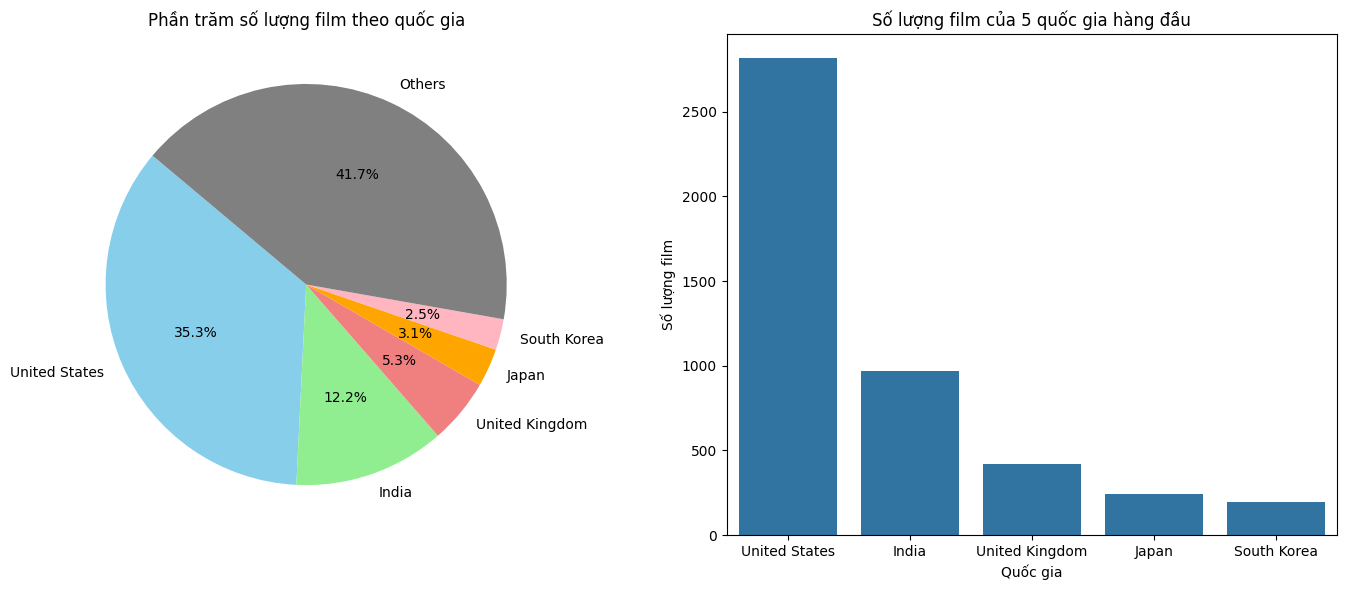

In [200]:
# Đếm số lượng film ở mỗi quốc gia
country_count = df["country"].value_counts()
top_countries = country_count.head(5)
other_countries_count = country_count[5:].sum()
top_and_others = pd.concat([top_countries, pd.Series(other_countries_count, index=['Others'])])

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Pie chart
axes[0].pie(top_and_others, labels=top_and_others.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'grey'])
axes[0].set_title("Phần trăm số lượng film theo quốc gia")

# Countplot
sns.countplot(x='country', data=df, order=country_count.index[:5], ax=axes[1])
axes[1].set_xlabel("Quốc gia")
axes[1].set_ylabel("Số lượng film")
axes[1].set_title("Số lượng film của 5 quốc gia hàng đầu")

# Adjust layout
plt.tight_layout()
plt.show()


#### Lí do chọn biểu đồ
- Pie chart là một lựa chọn phù hợp vì chúng ta quan tâm đến phân phối phần trăm của số lượng bộ phim ở mỗi quốc gia so với tổng số lượng bộ phim. Ở đây, ta lấy 5 quốc gia có nhiều phim nhất và gom tất cả các quốc gia còn lại thành nhóm others để dễ trực quan.
- Countplot là một lựa chọn phù hợp khi muốn biểu diễn phân phối của một biến phân loại (categorical variable) dưới dạng số lượng.
Ở đây, biến phân loại là country và số lượng film là country_count. Chỉ lấy top 5 quốc gia để dễ trực quan hóa.


#### Nhận xét
- Với tỉ lệ sản xuất phim chiếm 35.3% và gần 3000 bộ phim, Mỹ tiếp tục đóng vai trò quan trọng như một trung tâm sản xuất phim trên Netflix. Sức mạnh của ngành công nghiệp điện ảnh Mỹ và sự phát triển của Hollywood được phản ánh rõ qua con số này.
- Với tỉ lệ sản xuất phim đạt 12.2% và gần 1000 bộ phim, Ấn Độ cũng là một trong những thị trường điện ảnh lớn nhất thế giới, và sự nổi tiếng của Bollywood đã góp phần vào sự đa dạng nội dung trên Netflix.
- Biểu đồ cũng cho thấy sự đa dạng và phong phú của nội dung trên Netflix, phản ánh một môi trường đa văn hóa và đa ngôn ngữ trong ngành công nghiệp điện ảnh.

### Nhận xét về xếp loại (Rating) của các bộ phim

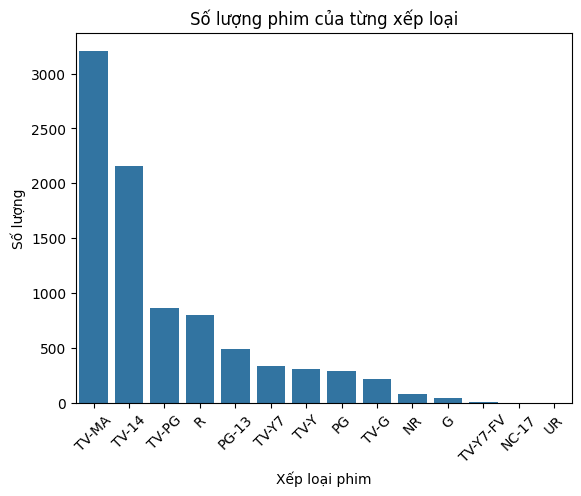

In [201]:
rating_count = df["rating"].value_counts(normalize=True)
sns.countplot(x="rating", data=df, order=rating_count.index)
plt.xlabel('Xếp loại phim')
plt.ylabel('Số lượng')
plt.title('Số lượng phim của từng xếp loại')
plt.xticks(rotation=45)
plt.show()

#### Lí do chọn biểu đồ 
- Countplot là một lựa chọn phù hợp khi muốn biểu diễn phân phối của một biến phân loại (categorical variable) dưới dạng số lượng.
- Ở đây, biến phân loại là rating và số lượng film là rating_count. 

#### Nhận xét
- Nhìn chung, tag TV-MA (không phù hợp cho người dưới 17 tuổi) là tag phổ biến nhất, tiếp theo đó là tag TV-14 (phù hợp cho người 14 tuổi trở lên). 

### Nhận xét về thể loại (Listed_in) của các bộ phim

In [202]:
#creating a dataframe for tv show
tv_show = (df['type'] == 'TV Show')
tvdf = df[tv_show]

In [203]:
#creating a dataframe for movies
movie = (df['type'] == 'Movie')
movie_df = df[movie]

In [204]:
#movie genres
genres = {}
for genre in movie_df['listed_in']:
    for i in genre.split(','):
        i=i.strip()
        if i not in genres:
            genres[i] = 1
        else:
            genres[i] += 1
        
genre_movie_df = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
genre_movie_df['Genre'].unique()
genre_movie_df.sort_values(by = 'Number of Movies', ascending = False).head()
top_genres = genre_movie_df.nlargest(5, columns="Number of Movies")

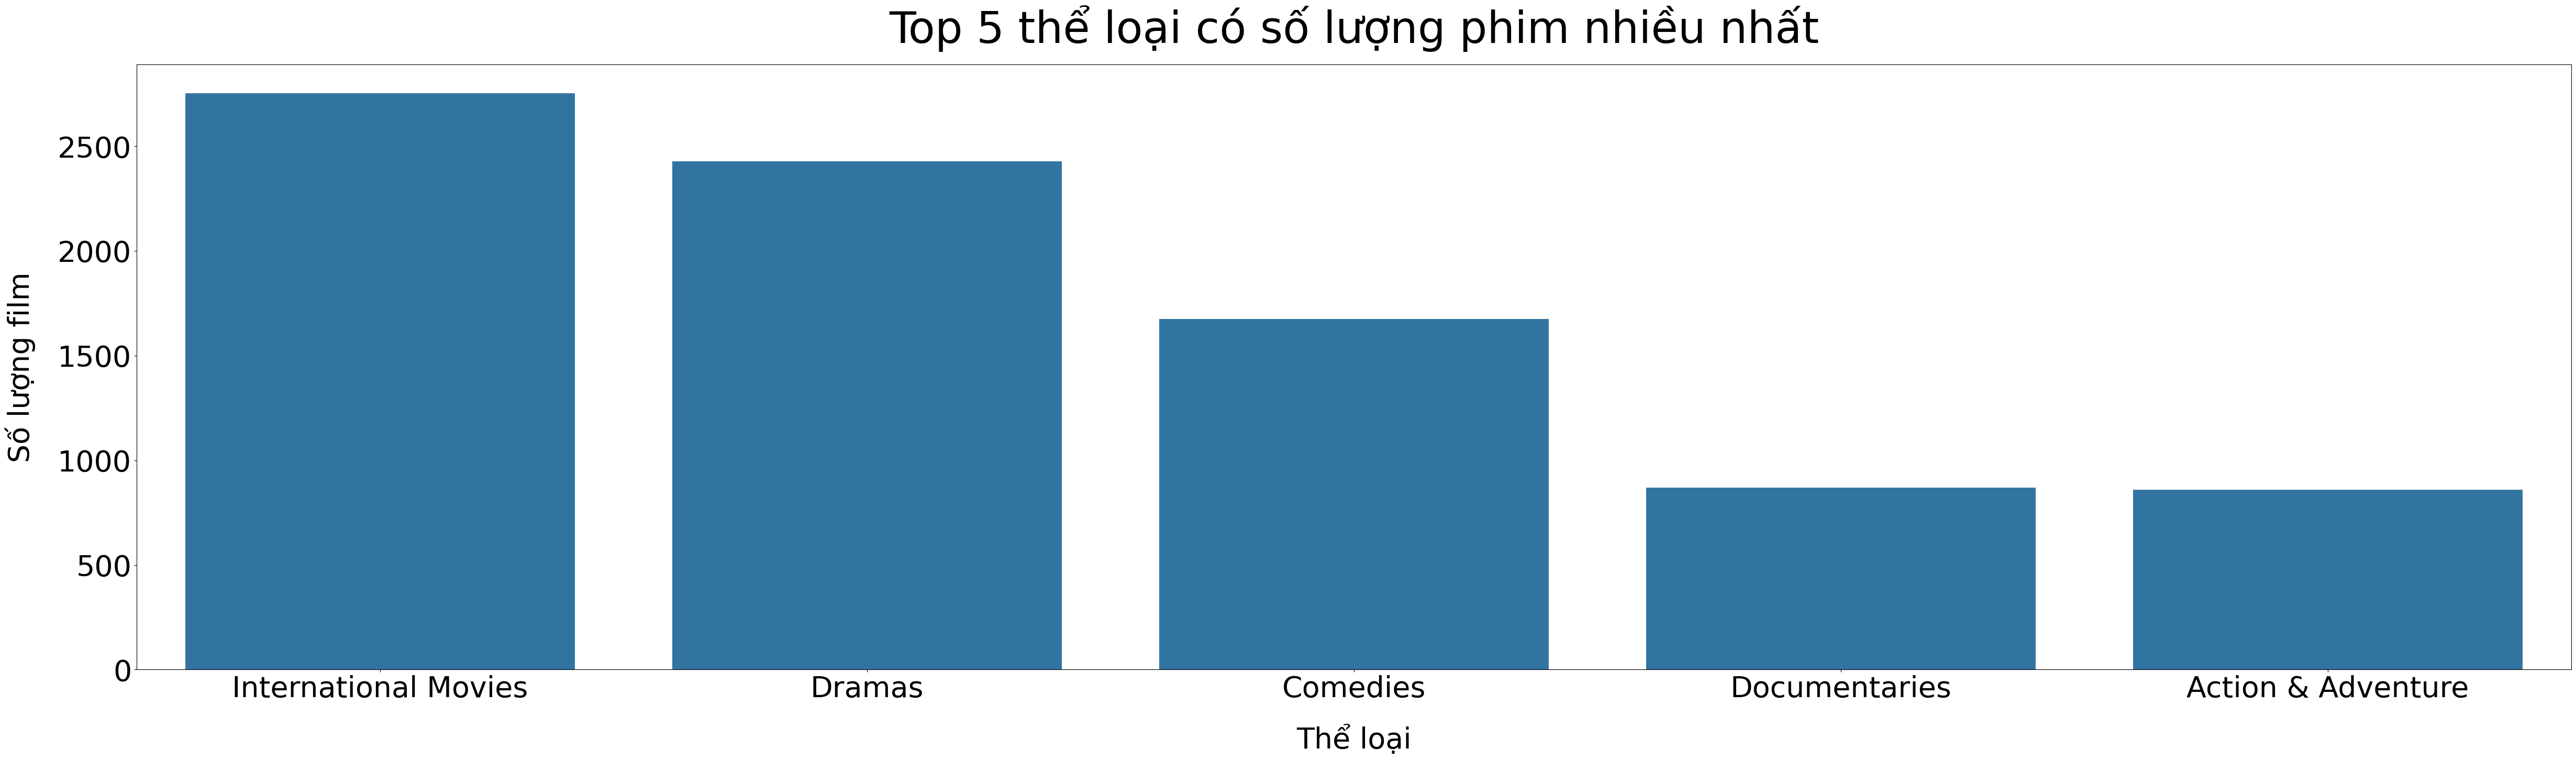

In [210]:
fig, ax = plt.subplots(figsize=(60, 15))
sns.barplot(x='Genre', y='Number of Movies',
            data=top_genres.sort_values(by='Number of Movies', ascending=False))
ax.set_title("Top 5 thể loại có số lượng phim nhiều nhất", fontsize=60, pad=30)
plt.tick_params(labelsize=40) 
ax.set_xlabel('Thể loại', fontsize=40, labelpad=30)  
ax.set_ylabel('Số lượng film', fontsize=40, labelpad=30)
plt.show()

#### Lí do chọn biểu đồ 
- Countplot là một lựa chọn phù hợp khi muốn biểu diễn phân phối của một biến phân loại (categorical variable) dưới dạng số lượng.
- Ở đây, biến phân loại là genre và số lượng film là Number of Movies. Chỉ lấy top 5 thể loại có nhiều phim nhất để trực quan hóa.

#### Nhận xét: 
- Có thể dễ dàng nhận thấy, tag phim đa quốc gia là loại phim có số lượng nhiều nhất ở netflix, theo sau đó là phim truyện. 
- Các thể loại khác kém phổ biến hơn là Hài kịch, phim tài liệu và phim phiêu lưu hành động. 
- Phim đa quốc gia ở đây ko phải là một thể loại phim mà hay được xem như một tính chất hơn. Do đó không khó hiểu khi tag đa quốc gia sẽ là nhiều nhất.

### Nhận xét về số lượng phim được thêm vào theo tháng

In [206]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.drop('date_added',axis=1,inplace=True)

df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

df_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv2 = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_tv2['percent'] = df_tv2['count'].apply(lambda x : 100*x/sum(df_tv2['count']))


df_movies2 = df_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_movies2['percent'] = df_movies2['count'].apply(lambda x : 100*x/sum(df_movies2['count']))

t1 = go.Scatter(x=df_movies2['month_name_added'], y=df_movies2["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv2['month_name_added'], y=df_tv2["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['month_name_added'], y=df_content["count"], name="Total Contents", marker=dict(color="Brown"))


data = [t1, t2, t3]

layout = go.Layout(title="Số lượng phim được thêm vào theo tháng", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

#### Lý do chọn biểu đồ
- Line chart có lợi cho việc quan sát sự thay đổi và xu hướng tăng giảm số lượng nội dung qua các giai đoạn thời gian.
- Line chart cũng hữu ích trong việc trình bày các thay đổi nhỏ mà khó có thể thể hiện được trong các biểu đồ khác.
- Line chart rất hữu dụng để làm nổi bật những điểm bất thường trong toàn bộ dữ liệu.
- Có thể vẽ nhiều hơn 1 đường trong cùng hệ tọa độ để có thể so sánh.

#### Nhận xét

- Nội dung được thêm vào nhiều ở đầu năm (tháng 1), khoảng từ tháng 3 - 4, giữa năm (tháng 7), và cuối năm (tháng 12)
- Tháng 2 là tháng có nội dung được thêm vào ít nhất


### Các đạo diễn phim người Mỹ sáng tạo nhiều nội dung trên netflix nhất

In [214]:
from collections import Counter

small = df[df["type"] == "Movie"]
small = small[small["country"] == "United States"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(13)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))

data = [trace1]
layout = go.Layout(title="Top 12 đạo diễn phim người Mỹ sáng tạo nhiều phim điện ảnh nhất", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

#### Lý do chọn biểu đồ
- Biểu đồ cột ngang (horizontal bar chart) phù hợp để hiển thị sự so sánh số lượng phim của mỗi đạo diễn người Mỹ.  
- Tên nhãn dài có thể được biểu thị dễ dàng, dễ đọc mà không bị chồng với tên nhãn khác (vertical bar chart).
- Dễ dàng trình bày dữ liệu với số lượng lớn.


#### Nhận xét
- Đạo diễn người Mỹ có số lượng phim nhiều nhất là Jay Karas với 15 bộ phim, cùng với đạo diễn Marcus Raboy nhiều thứ 2 với 14 bộ phim
- Từ biểu đồ trên ta cũng có thể kết luận được độ ảnh hưởng của từng đạo diễn người Mỹ đối với nền phim điện ảnh

### Nhận xét về tỷ lệ các loại hình phim (Type) qua các thập kỷ (Decade)

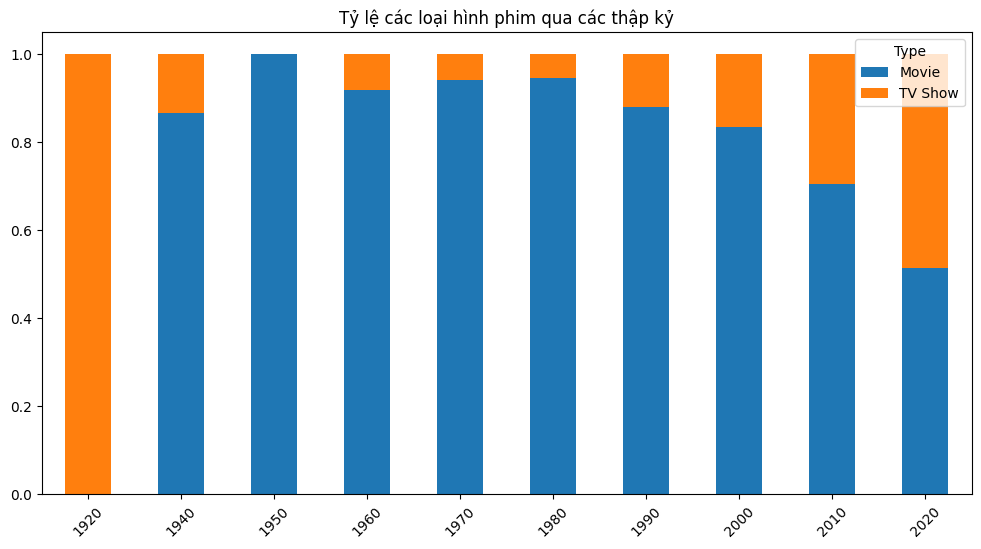

In [208]:
df['decade'] = (df['release_year'] // 10) * 10

grouped = df.groupby(['decade', 'type']).size().unstack(fill_value=0)
normalized = grouped.div(grouped.sum(axis=1), axis=0)

normalized.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Tỷ lệ các loại hình phim qua các thập kỷ')
plt.xlabel('')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()

#### Lí do chọn biểu đồ
- Biểu đồ cột chồng (stacked bar chart) thường được sử dụng để so sánh tỷ lệ phần trăm của các nhóm con trong một tập hợp lớn, giúp người đọc dễ dàng so sánh sự phân bố của các loại hình phim qua các thập kỷ một cách trực quan.
- Việc sử dụng biểu đồ cột chồng cũng giúp hiển thị tổng thể của dữ liệu cũng như mối quan hệ giữa các loại hình phim qua thời gian.

#### Nhật xét
- Tỷ lệ phần trăm của các loại phim đã thay đổi đáng kể qua các thập kỷ. 
- Những năm giữa của thế kỷ 20, các chương trình của Netflix chủ yếu là Movie, tuy nhiên từ thập niên 1960 đến hiện tại, tỷ lệ của TV Show có xu hướng tăng dần, đặc biệt từ thập niên 2000 sự gia tăng tỉ lệ của TV Show càng trở nên rõ rệt.

### Nhận xét về tỷ lệ loại hình phim (Type) của các quốc gia (Country)

type               Movie   TV Show
United States   0.730305  0.269695
India           0.918724  0.081276
United Kingdom  0.491647  0.508353
Japan           0.310204  0.689796
South Korea     0.206030  0.793970
Other           0.727355  0.272645


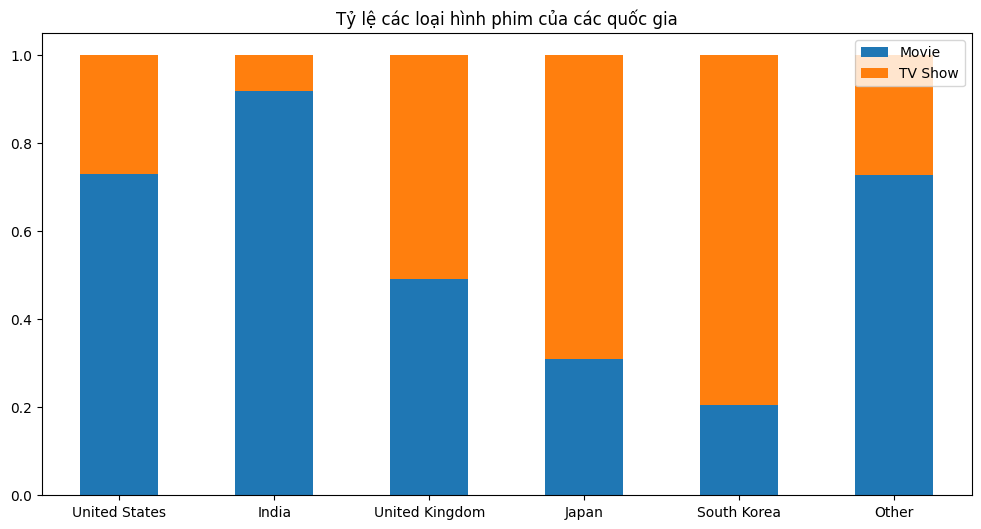

In [209]:
# Group by country and type, then count occurrences
grouped_df = df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Get top 5 countries by count
top_countries = grouped_df.sum(axis=1).nlargest(5).index

# Aggregate counts for top 5 countries
top_df = grouped_df.loc[top_countries]

# Sum counts for the rest of the countries
rest_df = grouped_df.drop(top_countries)
rest_sum = rest_df.sum()
rest_df = pd.DataFrame(rest_sum).transpose()
rest_df.index = ['Other']  # Rename index to "Other"

# Concatenate top countries and the rest
final_df = pd.concat([top_df, rest_df])

# Normalize each row to get proportions
normalized_df = final_df.div(final_df.sum(axis=1), axis=0)

print(normalized_df)

# Plotting
normalized_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Tỷ lệ các loại hình phim của các quốc gia')
plt.xticks(rotation=0)

plt.legend(title='')
plt.show()


### Lý do chọn biểu đồ
- Biểu đồ cột chồng trong trường hợp này là để so sánh tỷ lệ phần trăm của các loại hình phim giữa các quốc gia. 
- Biểu đồ giúp người đọc dễ dàng nhận biết tỷ lệ phần trăm của từng loại hình phim trong mỗi quốc gia và hiểu được mức độ đóng góp của từng loại hình phim vào tổng thể của mỗi quốc gia.

### Nhận xét
- Tỷ lệ phần trăm của các loại phim có sự khác biệt đáng kể qua từng quốc gia. 
- Trong top 5 các quốc gia có số lượng phim nhiều nhất, United States và India có tỷ lệ Movie cao nhất, trong khi TV Show chỉ chiếm tỷ lệ nhỏ rất nhỏ. 
- Ngược lại, Japan và South Korea lại có tỷ lệ TV Show rất cao trong khi Movie có tỷ lệ nhỏ hơn nhiều. United Kingdom có tỷ lệ gần như đồng đều giữa Movie và TV Show. 
- Nhóm các quốc gia ngoài top 5 có tỉ lệ Movie áp đảo so với TV Show.
- Trong top 5 quốc gia có số lượng phim nhiều nhất, quốc gia có tỉ lệ Movie cao nhất là India, quốc gia có tỷ lệ TV Show cao nhất là Korea.